# IMAGE PROCESSING MANIPULATION 

In [127]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [16]:
image = Image.open("cat.jpg")
image2 = Image.open("dog.jpeg")

In [17]:
image.show()

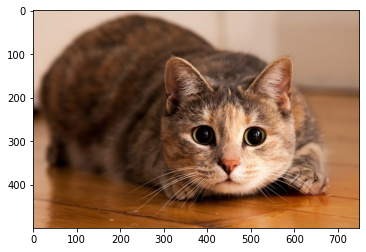

In [19]:
plt.imshow(image)

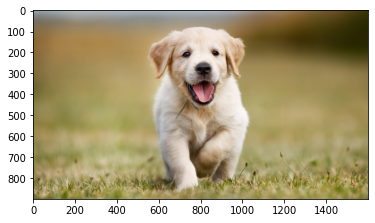

In [20]:
plt.imshow(image2)

In [21]:
print(image.size)
print(image.format)
print(image.mode)

(750, 500)
JPEG
RGB


In [23]:
image.save("newimage.jpg")

### croping

In [30]:
# left = 50
# top = 120
# right = 250
# bottom = 230
# crop_image = image.crop((left,top,right,bottom))
# plt.imshow(crop_image)

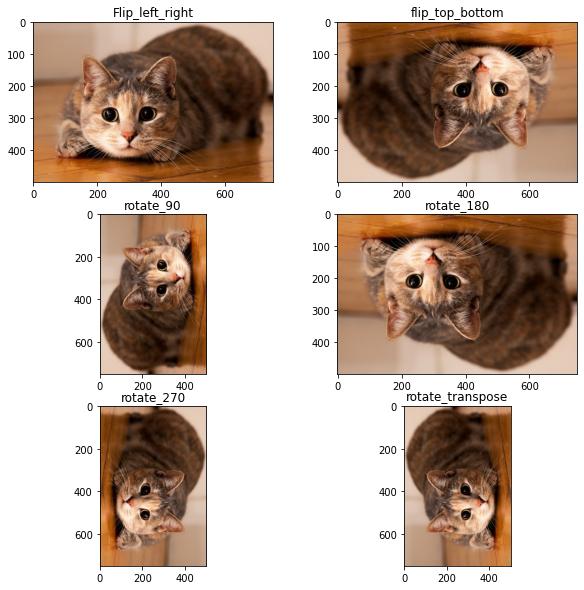

In [32]:
transpose_image1 = image.transpose(Image.FLIP_LEFT_RIGHT)
transpose_image2 = image.transpose(Image.FLIP_TOP_BOTTOM)
transpose_image3 = image.transpose(Image.ROTATE_90)
transpose_image4 = image.transpose(Image.ROTATE_180)
transpose_image5 = image.transpose(Image.ROTATE_270)
transpose_image6 = image.transpose(Image.TRANSPOSE)
plt.figure(figsize=(10,10))
plt.subplot(3,2,1)
plt.imshow(transpose_image1)
plt.title("Flip_left_right")
plt.subplot(3,2,2)
plt.imshow(transpose_image2)
plt.title("flip_top_bottom")
plt.subplot(3,2,3)
plt.imshow(transpose_image3)
plt.title("rotate_90")
plt.subplot(3,2,4)
plt.imshow(transpose_image4)
plt.title("rotate_180")
plt.subplot(3,2,5)
plt.imshow(transpose_image5)
plt.title("rotate_270")
plt.subplot(3,2,6)
plt.imshow(transpose_image6)
plt.title("rotate_transpose")
plt.show()

### Resizing

Text(0.5, 1.0, 'Lanczos')

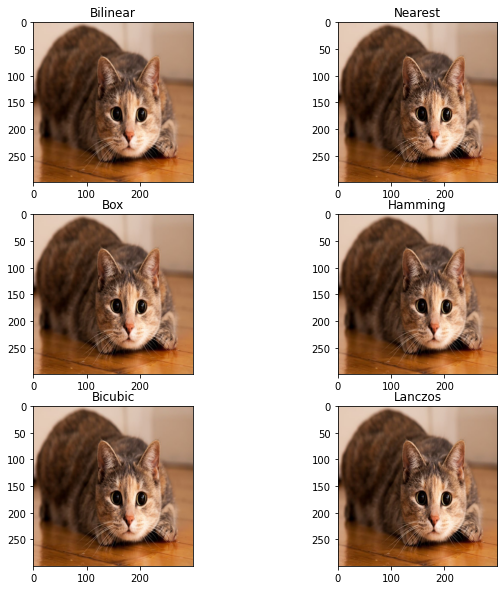

In [33]:
newsize = (300,300)
plt.figure(figsize= (10,10))
resized_image1 = image.resize(newsize,Image.BILINEAR) # descent quality
resized_image2 = image.resize(newsize,Image.NEAREST)# poor quality
resized_image3 = image.resize(newsize,Image.BOX) #not recommend
resized_image4 = image.resize(newsize,Image.HAMMING) #better than bilinear
resized_image5 = image.resize(newsize,Image.BICUBIC) #better quality
resized_image6 = image.resize(newsize,Image.LANCZOS) #better quality

plt.subplot(3,2,1)
plt.imshow(resized_image1)
plt.title("Bilinear")
plt.subplot(3,2,2)
plt.imshow(resized_image2)
plt.title("Nearest")
plt.subplot(3,2,3)
plt.imshow(resized_image3)
plt.title("Box")
plt.subplot(3,2,4)
plt.imshow(resized_image4)
plt.title("Hamming")
plt.subplot(3,2,5)
plt.imshow(resized_image5)
plt.title("Bicubic")
plt.subplot(3,2,6)
plt.imshow(resized_image6)
plt.title("Lanczos")

# Rotate

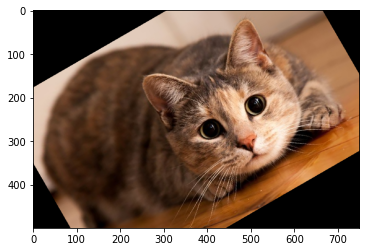

In [36]:
angle = 30
rotated_image=image.rotate(angle)
plt.imshow(rotated_image)

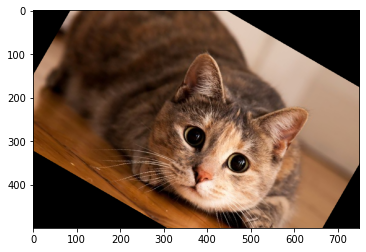

In [37]:
angle = -30
rotated_image=image.rotate(angle)
plt.imshow(rotated_image)

# Make a watermark

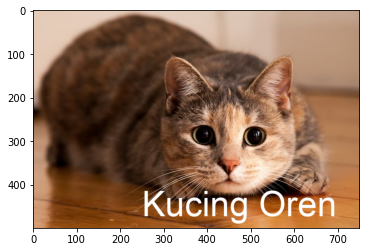

In [53]:
from PIL import ImageFont
from PIL import ImageDraw
watermarked_image = image.copy()
draw = ImageDraw.Draw(watermarked_image)
font = ImageFont.truetype("arial.ttf",80) #choose font
#(pos,text,fill_color, font_object)
# draw.text((0,0),"Kucing Oren",(0,0,0),font=font)
draw.text((250,400),"Kucing Oren",(255,255,255),font=font)
plt.imshow(watermarked_image)

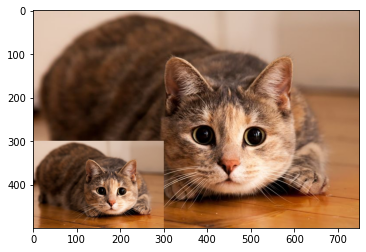

In [54]:
size = (300,300)
crop_image = image.copy()
crop_image.thumbnail(size)

copied_image = image.copy()
copied_image.paste(crop_image,(0,300))
plt.imshow(copied_image)

# Convert to black and white

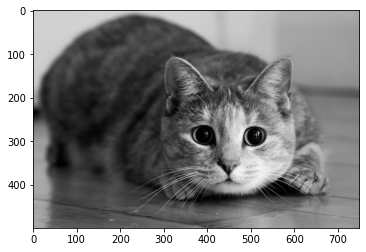

In [61]:
bw_image = image.convert('F') #you can use L
plt.imshow(bw_image, cmap='gray')

### convert to different formats

In [63]:
new_format_image = image.convert('HSV') #hue saturated value
print(new_format_image.mode)

HSV


### convert to numpy format

In [66]:
numpy_array = np.array(image)
print(numpy_array.shape)

(500, 750, 3)


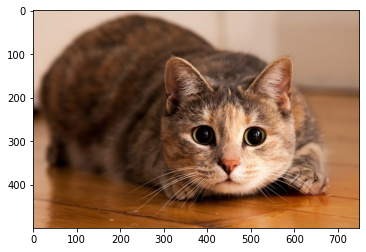

In [68]:
# convert back into image
numpy_image = Image.fromarray(numpy_array)
plt.imshow(numpy_array)

### Image Enhancement

Text(0.5, 1.0, 'sharpness')

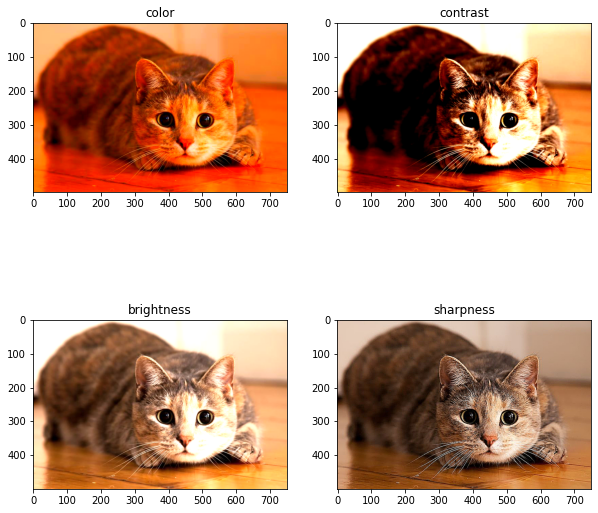

In [80]:
from PIL import ImageEnhance
plt.figure(figsize=(10,10))
image_color_enhan = image.copy()
image1 = ImageEnhance.Color(image_color_enhan).enhance(3.5)
image2 = ImageEnhance.Contrast(image_color_enhan).enhance(2.5)
image3 = ImageEnhance.Brightness(image_color_enhan).enhance(1.5)
image4 = ImageEnhance.Sharpness(image_color_enhan).enhance(8.5)
plt.subplot(2,2,1)
plt.imshow(image1)
plt.title("color")
plt.subplot(2,2,2)
plt.imshow(image2)
plt.title("contrast")
plt.subplot(2,2,3)
plt.imshow(image3)
plt.title("brightness")
plt.subplot(2,2,4)
plt.imshow(image4)
plt.title("sharpness")

# Alpha blending

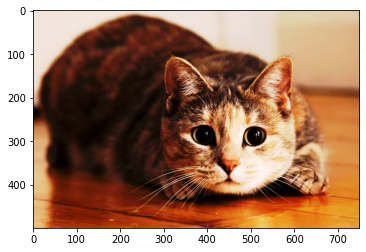

In [83]:
image1 = image.copy()
image2 = image2.copy()

#making both images same size
image2=image2.resize(image1.size)

image_blend = Image.blend(image1,image2, 0.5)
plt.imshow(image_blend)

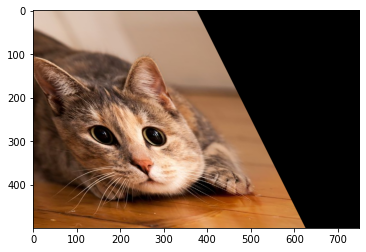

In [90]:
image_transform = image.copy()
image_transform=image_transform.transform(image_transform.size, Image.AFFINE,(1,-0.5,0.5*image_transform.size[0],0,1,0))
plt.imshow(image_transform)

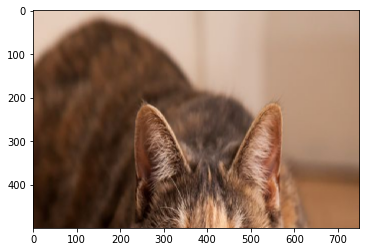

In [122]:
image_transform = image.copy()
image_transform = image_transform.transform(image_transform.size, Image.EXTENT,(100,0, image_transform.size[0],image_transform.size[1]//2))
plt.imshow(image_transform)

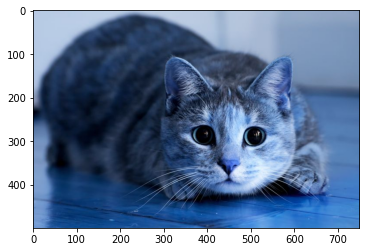

In [123]:
image_channels =image.copy()
r,g,b = image_channels.split()
im = Image.merge("RGB",(b,g,r))
plt.imshow(im)